In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import seaborn as sns
import re
import os
import sys
import ast
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
reviews = pd.read_csv("Reviews.csv")

In [8]:
# print of first 5 rows of the dataset
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
# print of last 5 rows of the dataset
reviews.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [10]:
#number of rows and columns 
reviews.shape

(568454, 10)

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [12]:
reviews.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [13]:
reviews.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [15]:
# converting all text to lower case 
reviews["Text"] = reviews["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [16]:
# removing punctuations
reviews["Text"] = reviews["Text"].str.replace('[^\w\s]', "")
reviews.Text.head(5)

<ipython-input-16-bbf4cc7e5f53>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews["Text"] = reviews["Text"].str.replace('[^\w\s]', "")


0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price there was a wide ...
Name: Text, dtype: object

In [17]:
# removing stopwords
stop = stopwords.words('english')
reviews['Text'] = reviews['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
reviews.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [18]:
# spelling correction
# lemmatization
reviews['Text'] = reviews['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
reviews.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanutsth...
2    confection around century light pillowy citrus...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object

In [19]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [20]:
reviews.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:xlabel='Score', ylabel='count'>

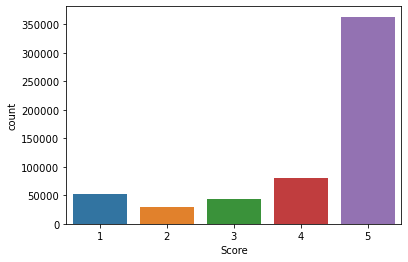

In [23]:
sns.countplot(data = reviews, x = 'Score')

In [24]:
# Create a new data frame "reviews_df" to perform EDA
reviews_df = reviews

In [25]:
# Dropping null values
reviews_df.dropna(inplace=True)

In [26]:
score_1 = reviews_df[reviews_df['Score'] == 1]
score_2 = reviews_df[reviews_df['Score'] == 2]
score_3 = reviews_df[reviews_df['Score'] == 3]
score_4 = reviews_df[reviews_df['Score'] == 4]
score_5 = reviews_df[reviews_df['Score'] == 5]

In [27]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

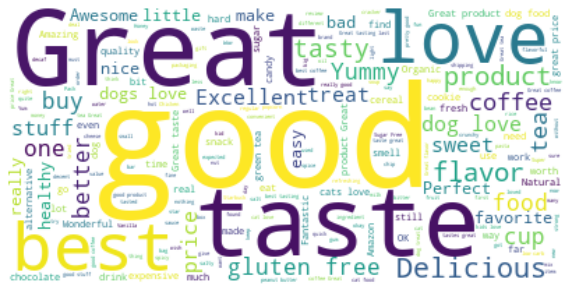

In [28]:
# wordcloud
# wordcloud needs a single string
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
# splitting the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

In [30]:
# Transforming to single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

In [31]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

Text(0.5, 1.0, 'Reviews with Negative Scores')

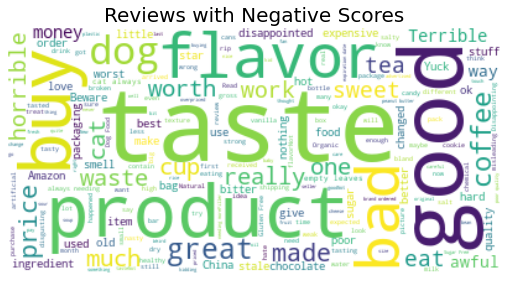

In [32]:
# wordcloud with naegative scores
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)

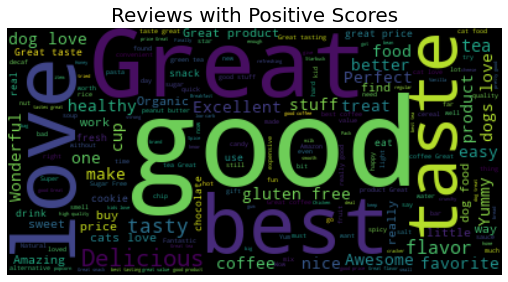

In [33]:
# wordcloud with positive scores
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [34]:
plt.style.use('fivethirtyeight')
# Function for getting the sentiment
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()

In [36]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in reviews['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
#Creating new dataframe with sentiments
reviews_sentiments=pd.DataFrame(emptyline)
reviews_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.503,0.497,0.9413
1,0.129,0.762,0.110,-0.1027
2,0.130,0.587,0.283,0.8532
3,0.000,0.854,0.146,0.4404
4,0.000,0.369,0.631,0.9468


In [38]:
# Merging the sentiments back to reviews dataframe
reviews_c = pd.concat([reviews.reset_index(drop=True), reviews_sentiments], axis=1)
reviews_c.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532


In [39]:
# Convert scores into positive and negetive sentiments using some threshold
reviews_c['Sentiment'] = np.where(reviews_c['compound'] >= 0 , 'Positive','Negative')
reviews_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.503,0.497,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanutsth...,0.129,0.762,0.110,-0.1027,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around century light pillowy citrus...,0.130,0.587,0.283,0.8532,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.854,0.146,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,0.000,0.369,0.631,0.9468,Positive


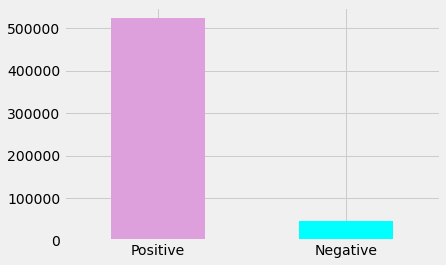

In [40]:
result=reviews_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['plum','cyan']);